In [189]:
!pip install TextBlob

In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Women's E-Commerce Clothing Reviews Dataset
data = pd.read_csv("/Womens Clothing E-Commerce Reviews.csv",index_col=0)

data.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


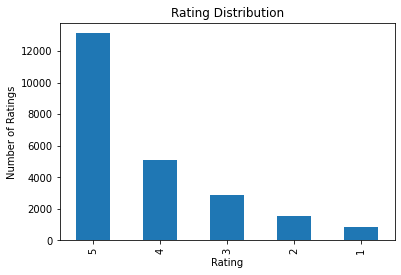

In [ ]:
#  It is obvious that the dataset is massively unbalanced
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Rating Distribution")
data['Rating'].value_counts().plot(kind='bar')

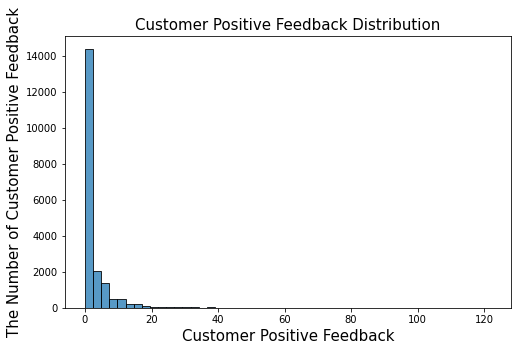

In [188]:
# Positive Feedback Distribution
# Stating that the dataset is heavily unbalanced and skewed towards users who found this review positive
plt.figure(figsize = (8, 5))
plt.title('Customer Positive Feedback Distribution', fontsize=15)
plt.xlabel("Customer Positive Feedback", fontsize=15)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=15)

sns.histplot(data, x='Positive Feedback Count', kde = False, bins = 50);

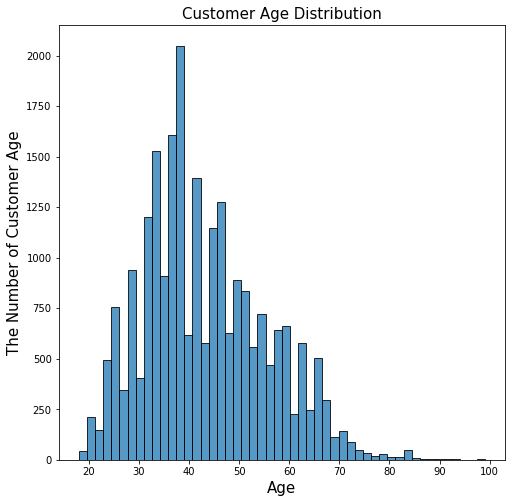

In [ ]:
# Customer Age Distribution
plt.figure(figsize = (8, 8))
plt.title('Customer Age Distribution', fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("The Number of Customer Age", fontsize=15)

sns.histplot(data, x='Age', kde = False, bins = 50);

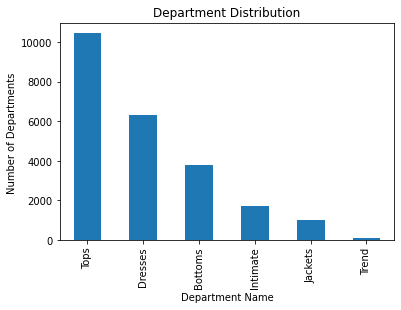

In [ ]:
# We can see that the majority of people 
plt.xlabel("Department Name")
plt.ylabel("Number of Departments ")
plt.title("Department Distribution")
data['Department Name'].value_counts().plot(kind='bar')

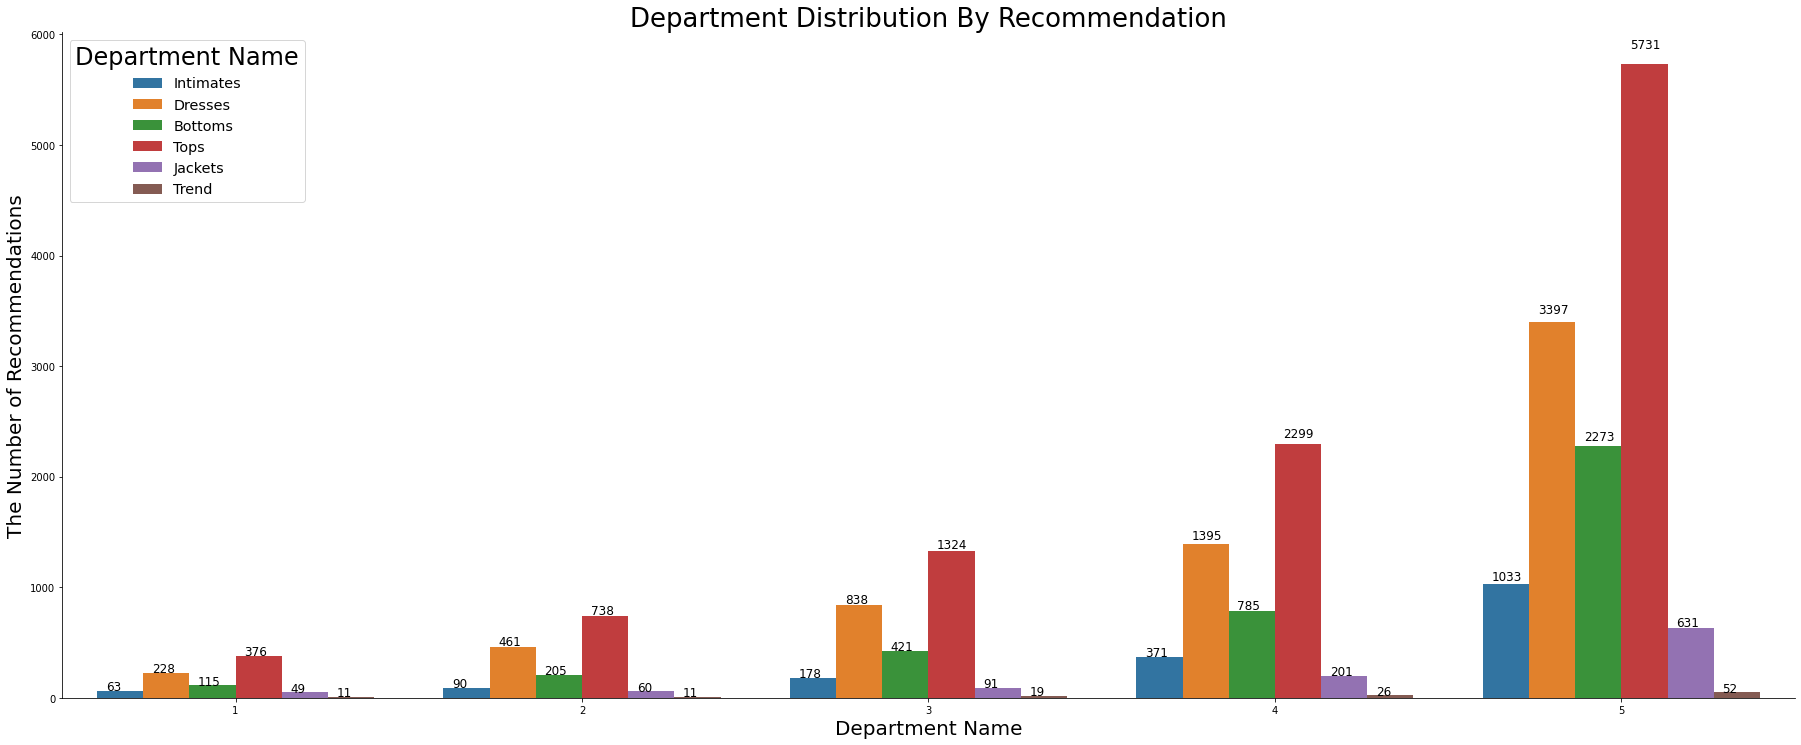

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Department Distribution by Recommendaiton
# Compares the Rating and the Department Names to see the correlation between them 
g = sns.catplot(data = data, x ="Rating", hue = "Department Name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
# Data Preprocessing

# Merge Title and Review Text
data['Review'] = data['Title'] + ' ' + data['Review Text']

# Dropping unneeded columns
data.drop(labels=['Clothing ID','Title','Review Text'], axis=1, inplace=True)

# Dropping columns with no reviews
data = data[~data['Review'].isnull()]

#data.head(3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from textblob import *
import plotly.express as px

data['polarity'] = data['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
px.histogram(data, x = 'polarity',color="Rating", opacity = 0.5)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Import NLP dependencies
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(data['Review'])

# Must clean up review text via tokenization, removing stopwords, etc.

# Apply NLTK stopwords
stop_words = stopwords.words('english')
stemmer = PorterStemmer()
# Removes stop words like: as is, am, are, this, a, an, the, etc.
data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# Stemming
# Lingunstic Normalization, reduces words to their root word ex: conneciton, connected, connecting get reduced to "connect"
data['Review'].apply(lambda x: [stemmer.stem(y) for y in x])
#data['Review'].head(10)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2        [S, o, m, e,  , m, a, j, o, r,  , d, e, s, i, ...
3        [M, y,  , f, a, v, o, r, i, t, e,  , b, u, y, ...
4        [F, l, a, t, t, e, r, i, n, g,  , s, h, i, r, ...
5        [N, o, t,  , f, o, r,  , t, h, e,  , v, e, r, ...
6        [C, a, g, r, c, o, a, l,  , s, h, i, m, m, e, ...
                               ...                        
23481    [G, r, e, a, t,  , d, r, e, s, s,  , f, o, r, ...
23482    [W, i, s, h,  , i, t,  , w, a, s,  , m, a, d, ...
23483    [C, u, t, e, ,,  , b, u, t,  , s, e, e,  , t, ...
23484    [V, e, r, y,  , c, u, t, e,  , d, r, e, s, s, ...
23485    [P, l, e, a, s, e,  , m, a, k, e,  , m, o, r, ...
Name: Review, Length: 19675, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

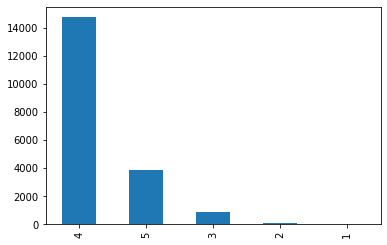

In [ ]:
# Calculate polarity scores from -1 to 1
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

data['Polarity'] = data['Review'].apply(get_polarity)
# Negative = 0
# Neutral = 1
# Positive = 2
data['Sentiment_Type']=''
data.loc[data.Polarity <= -0.6, 'Sentiment_Type']= 1
data.loc[(data.Polarity > -0.6) & (data.Polarity < -0.2), 'Sentiment_Type']= 2
data.loc[(data.Polarity >= -0.2) & (data.Polarity <= 0), 'Sentiment_Type']= 3
data.loc[(data.Polarity > 0) & (data.Polarity <= 0.4), 'Sentiment_Type']= 4
data.loc[data.Polarity > 0.4, 'Sentiment_Type']= 5

#data.Sentiment_Type.value_counts().plot(kind='bar',title="sentiment analysis")
data['Sentiment_Type'].value_counts().plot(kind='bar')


In [175]:
# Splitting Data into Train/Test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
review_counts= cv.fit_transform(data['Review'])

data['Sentiment_Type'] = data['Sentiment_Type'].astype('int')

# Split training and testing data with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(review_counts, data['Sentiment_Type'], test_size=0.2, random_state=1)


# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[4 4 4 ... 4 4 4]


In [183]:
# Random Forest
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print(y_rf_pred)

[4 5 4 ... 4 4 4]


In [182]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print(y_knn_pred)

[4 5 4 ... 4 5 5]


In [184]:
# Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)
print(y_nb_pred)

[4 5 5 ... 4 4 4]


In [185]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg_pred = logreg.predict(X_test)
print(y_logreg_pred)

[4 5 5 ... 4 4 5]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [186]:
# Ada Boosting 
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train, y_train)
y_ada_pred = ada.predict(X_test)
print(y_ada_pred)

[4 5 4 ... 4 4 4]


In [187]:
# SVM Classifier
svc = svm.SVC(kernel='linear') # Linear Kernel
svc.fit(X_train, y_train)
y_svm_pred = svc.predict(X_test)
print(y_svm_pred)

[4 5 5 ... 4 4 5]
